<a href="https://colab.research.google.com/github/drishtigulenia/data-science-Implementations/blob/comments-added/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# pandas is used to manipulate ur dataset.
import pandas as pd

# math has mathematical operations.
import math

from datetime import datetime
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# numpy is used to deal with multi-dimentional arrays and matrices.
import numpy as np

# from sklearn we import preprocessing to scale our data often termed as feature scaling.
# model_selection is cross_validation which is used to divide the data into training data and testing data.
# svm - support vector machine
from sklearn import preprocessing, model_selection, svm

# finally importing the algorithm which we use
from sklearn.linear_model import LinearRegression

In [38]:
# reading csv file
df = pd.read_csv('sample_data/nseistocks.csv')

# setting index of dataframe as date column
df = df.set_index('Date');

# calculating the percentage of stock price varience in a day
df['HL_PCT'] = ((df['High'] - df['Low']) / df['Low']) * 100

# calculating the percentage of stock price change when market closed to when market opened
df['PCT_change'] = ((df['Close'] - df['Open']) / df['Open']) * 100

# dropping all columns which are now not necessary. It is important to remove them to avoid any relationship between
# attributes as it might give us a misleading result.
df = df[['Close' ,'HL_PCT', 'PCT_change', 'Volume']]

# dropping missing data
df.dropna(inplace=True)

df.head()

,Close,HL_PCT,PCT_change,Volume
Date,,,,
2013-01-21,6082.299805,0.482267,-0.056693,130900.0
2013-01-22,6048.500000,1.006536,-0.520545,129000.0
2013-01-23,6054.299805,0.807984,0.023951,137000.0
2013-01-24,6019.350098,0.956244,-0.444082,185200.0
2013-01-25,6074.649902,1.099013,0.832433,147600.0


In [39]:
# setting value for how much days in future we want to see the prediction. Here it is 10 because we want to predict 
# before 10 days.
forecast_out = 10;

forecast_in = 'Close'

# filling nulls with -99999
df.fillna(-99999, inplace=True)

# setting label for our data
df['label'] = df[forecast_in].shift(-forecast_out)
df.tail()

,Close,HL_PCT,PCT_change,Volume,label
Date,,,,,
2021-05-24,15197.70020,0.731572,-0.089732,579800.0,NaN
2021-05-25,15208.45020,0.860290,-0.544737,441500.0,NaN
2021-05-26,15301.45020,0.822314,0.291016,384000.0,NaN
2021-05-28,15435.65039,0.486532,0.093703,468100.0,NaN
2021-05-31,15582.79981,1.511315,0.939579,436000.0,NaN


In [40]:
# initializing features and labels
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

P = X

# keeping some data to predict
X_predict = [15752.50, 0.82381028, -0.01332952, 242100]

# inserting the data which we want to predict to X data so that our X_predict can be scaled same as X.
X = np.insert(X, -3, X_predict)

# scaling features
X = preprocessing.scale(X)

# getting back our data we kept to predict which is now scaled
X_predict = X[-3:]

# removing X_predict from X
X = P

# removing data of 10 days from X and with this data also we will predict the label
X_lately = X[-forecast_out:]

X = X[:-forecast_out]
y = y[:-forecast_out]

# dropping nulls
df.dropna(inplace=True)


# dividing data into training data and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

# fitting data into model

# using support vector regression. default kernel is linear
# clf = svm.SVR(kernel='poly');
# it gives only 24.7% accuracy

# or

# using linear regression
# n_jobs :- number of threads you want to make. Higher the number of threads higher the speed of algorithm. If set 
# to -1, will run as many jobs as possible by your processor
clf = LinearRegression(n_jobs=-1)
# it gives 97% accuracy

clf.fit(X_train, y_train)

# testing the model to find accuracy
accuracy = clf.score(X_test, y_test)

# predicting label
forecast_set = clf.predict(X_lately)
print(accuracy, forecast_set)

# making a null column for keeping prediction values i.e, for values of x_lately
df['Forecast'] = np.nan

0.9660112969181812 [15012.3013276  15140.9975728  15072.36302905 14974.46749825
 15259.84131127 15235.18037063 15263.89439062 15367.66186453
 15473.537863   15690.33823023]


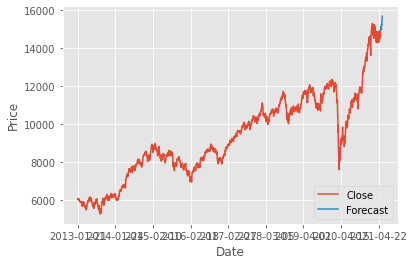

In [41]:
# getting last date of the data set i.e., the x data
last_date = df.iloc[-1].name

# getting timestamp of the date
last_unix = time.mktime(time.strptime(last_date, "%Y-%m-%d"))
one_day = 86400

# going onto next day time where unix is the time format
next_unix = last_unix + one_day

# forecast_set which is the set we seperated from x be4 to predict the label i.e., X_lately
for i in forecast_set:
  # converting next day's time to date
  next_date = datetime.fromtimestamp(next_unix)
  # again incrementing time by one day
  next_unix+=one_day
  # setting the value at index next_day i.e., date
  # setting the index next_day with all values to be not a number except the last column which is forecast and here
  # goes our predictions about X_lately
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

# plotting the graph wrt close and forecast values
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# blue part is the predicted values for 10 days in future

In [42]:
X_predict = [[15923.40, 0.50149219, -0.21900760, 276300]]
# X_predict = preprocessing.scale(X_predict)
predicted_label = clf.predict(X_predict)
predicted_label
# X_predict

array([15982.7290656])

In [43]:
df.tail(15)

,Close,HL_PCT,PCT_change,Volume,label,Forecast
Date,,,,,,
2021-05-07,14823.15039,0.660660,0.042524,488000.0,15197.70020,NaN
2021-05-10,14942.34961,0.499583,0.094449,522000.0,15208.45020,NaN
2021-05-11,14850.75000,0.870599,0.412786,647400.0,15301.45020,NaN
2021-05-12,14696.50000,1.190124,-0.857081,643800.0,15435.65039,NaN
2021-05-14,14677.79981,1.081079,-0.485447,620700.0,15582.79981,NaN
2021-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,15012.301328
2021-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,15140.997573
2021-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,15072.363029
2021-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,14974.467498
